<a href="https://colab.research.google.com/github/nagmafarez/IDS-Assignment/blob/main/Employee_salary_regression_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. **Importing the Libraries**

In [ ]:
# Importing Important Libraries

# Data manipulation
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# ANN model
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

#Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

# **2. Data Understanding**

In [ ]:
# Importing the Dataset
df = pd.read_csv('Employers_data.csv')
df.head()

,Employee_ID,Name,Age,Gender,Department,Job_Title,Experience_Years,Education_Level,Location,Salary
0,1,Merle Ingram,24,Female,Engineering,Engineer,1,Master,Austin,90000
1,2,John Mayes,56,Male,Sales,Executive,33,Master,Seattle,195000
2,3,Carlos Wille,21,Male,Engineering,Intern,1,Bachelor,New York,35000
3,4,Michael Bryant,30,Male,Finance,Analyst,9,Bachelor,New York,75000
4,5,Paula Douglas,25,Female,HR,Analyst,2,Master,Seattle,70000


In [ ]:
# Summerizing the dataset
df.shape

(10000, 10)

In [ ]:
# Checking for missing values
df.isnull().sum()

,0
Employee_ID,0
Name,0
Age,0
Gender,0
Department,0
Job_Title,0
Experience_Years,0
Education_Level,0
Location,0
Salary,0


In [ ]:
# Getting an idea about the duplicates in the data
df.duplicated().sum()

np.int64(0)

np.int64(0) means there is no duplicate rows in the dataset

In [ ]:
# Separating the data into input features and target variables
X = df.drop(['Salary', 'Employee_ID', 'Name'], axis=1)
y = df['Salary']

In [ ]:
# Getting the list of columns
print(X.columns)

Index(['Age', 'Gender', 'Department', 'Job_Title', 'Experience_Years',
       'Education_Level', 'Location'],
      dtype='object')


In [ ]:
# Getting the list of categorical and numerical columns
categorical = ['Gender', 'Department', 'Job_Title', 'Education_Level', 'Location']
numerical = ['Age', 'Experience_Years']

In [ ]:
# Identify target and features
target = 'Salary'
features = df.columns.drop(target)
print(f"Features: {features}")

Features: Index(['Employee_ID', 'Name', 'Age', 'Gender', 'Department', 'Job_Title',
       'Experience_Years', 'Education_Level', 'Location'],
      dtype='object')


# **3. Performing EDA**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Employee_ID       10000 non-null  int64 
 1   Name              10000 non-null  object
 2   Age               10000 non-null  int64 
 3   Gender            10000 non-null  object
 4   Department        10000 non-null  object
 5   Job_Title         10000 non-null  object
 6   Experience_Years  10000 non-null  int64 
 7   Education_Level   10000 non-null  object
 8   Location          10000 non-null  object
 9   Salary            10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [ ]:
# Scaling numerical features for Salary column
Scaler = StandardScaler()
df['Salary'] = Scaler.fit_transform(df[['Salary']])
df.head()

,Employee_ID,Name,Age,Gender,Department,Job_Title,Experience_Years,Education_Level,Location,Salary
0,1,Merle Ingram,24,Female,Engineering,Engineer,1,Master,Austin,-0.551007
1,2,John Mayes,56,Male,Sales,Executive,33,Master,Seattle,1.728438
2,3,Carlos Wille,21,Male,Engineering,Intern,1,Bachelor,New York,-1.745002
3,4,Michael Bryant,30,Male,Finance,Analyst,9,Bachelor,New York,-0.876642
4,5,Paula Douglas,25,Female,HR,Analyst,2,Master,Seattle,-0.985187


In [ ]:
# Scaling numerical features for Experience_Years column
df['Experience_Years'] = Scaler.fit_transform(df[['Experience_Years']])
df.head()

,Employee_ID,Name,Age,Gender,Department,Job_Title,Experience_Years,Education_Level,Location,Salary
0,1,Merle Ingram,24,Female,Engineering,Engineer,-1.242926,Master,Austin,-0.551007
1,2,John Mayes,56,Male,Sales,Executive,2.254918,Master,Seattle,1.728438
2,3,Carlos Wille,21,Male,Engineering,Intern,-1.242926,Bachelor,New York,-1.745002
3,4,Michael Bryant,30,Male,Finance,Analyst,-0.368465,Bachelor,New York,-0.876642
4,5,Paula Douglas,25,Female,HR,Analyst,-1.133618,Master,Seattle,-0.985187


In [ ]:
# Scaling numerical features for Age column
df['Age'] = Scaler.fit_transform(df[['Age']])
df.head()

,Employee_ID,Name,Age,Gender,Department,Job_Title,Experience_Years,Education_Level,Location,Salary
0,1,Merle Ingram,-1.145623,Female,Engineering,Engineer,-1.242926,Master,Austin,-0.551007
1,2,John Mayes,2.054469,Male,Sales,Executive,2.254918,Master,Seattle,1.728438
2,3,Carlos Wille,-1.445632,Male,Engineering,Intern,-1.242926,Bachelor,New York,-1.745002
3,4,Michael Bryant,-0.545606,Male,Finance,Analyst,-0.368465,Bachelor,New York,-0.876642
4,5,Paula Douglas,-1.045620,Female,HR,Analyst,-1.133618,Master,Seattle,-0.985187


In [ ]:
# Preprocessing Columns
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical),
    ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical)
])

In [ ]:
df.head()

,Employee_ID,Name,Age,Gender,Department,Job_Title,Experience_Years,Education_Level,Location,Salary
0,1,Merle Ingram,-1.145623,Female,Engineering,Engineer,-1.242926,Master,Austin,-0.551007
1,2,John Mayes,2.054469,Male,Sales,Executive,2.254918,Master,Seattle,1.728438
2,3,Carlos Wille,-1.445632,Male,Engineering,Intern,-1.242926,Bachelor,New York,-1.745002
3,4,Michael Bryant,-0.545606,Male,Finance,Analyst,-0.368465,Bachelor,New York,-0.876642
4,5,Paula Douglas,-1.045620,Female,HR,Analyst,-1.133618,Master,Seattle,-0.985187


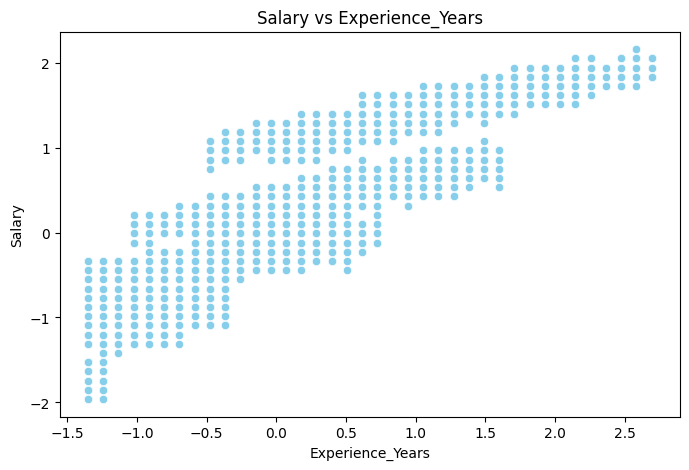

In [ ]:
# Create a scatter plot of Salary vs. Experience_Years
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Experience_Years', y=target, color='skyblue')
plt.title('Salary vs Experience_Years')
plt.xlabel('Experience_Years')
plt.ylabel('Salary')
plt.show()

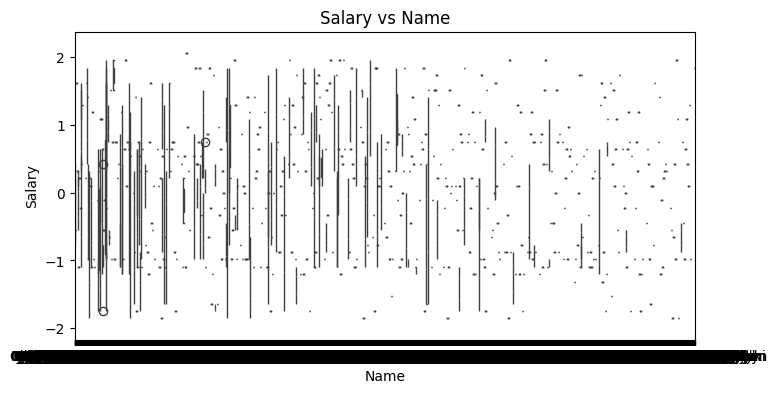

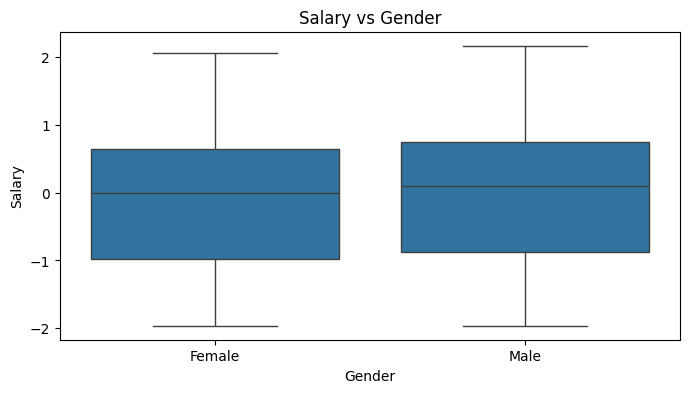

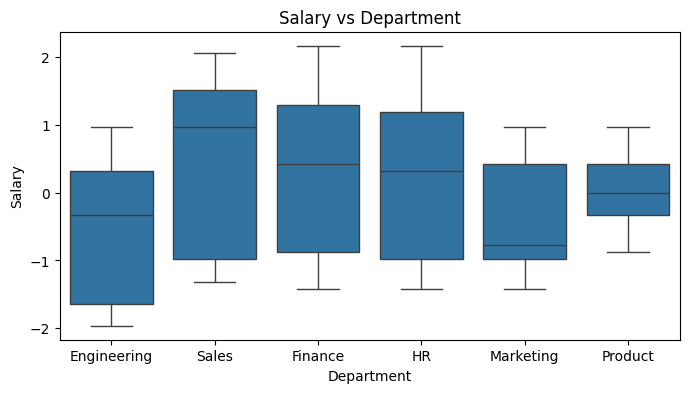

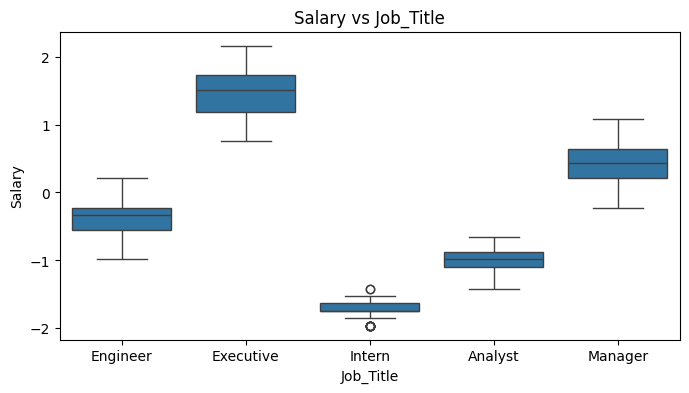

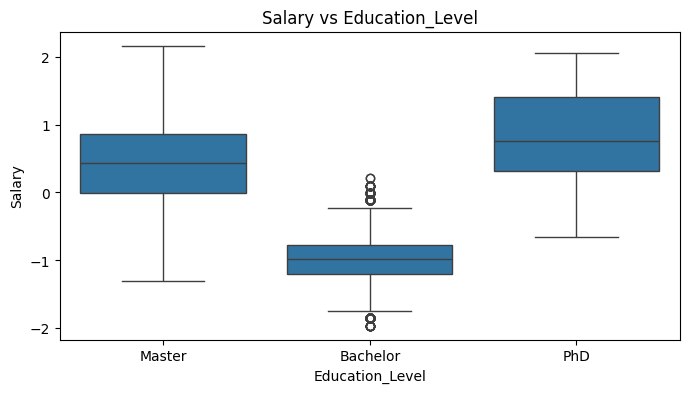

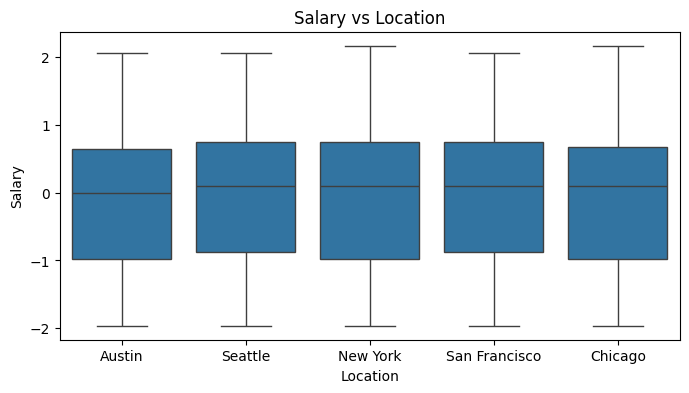

In [ ]:
categorical_features = df.select_dtypes(include=['object']).columns
for col in categorical_features:
  if col != 'name':
    plt.figure(figsize=(8,4))
    sns.boxplot(x=col, y=target, data=df)
    plt.title(f'{target} vs {col}')
    plt.show()


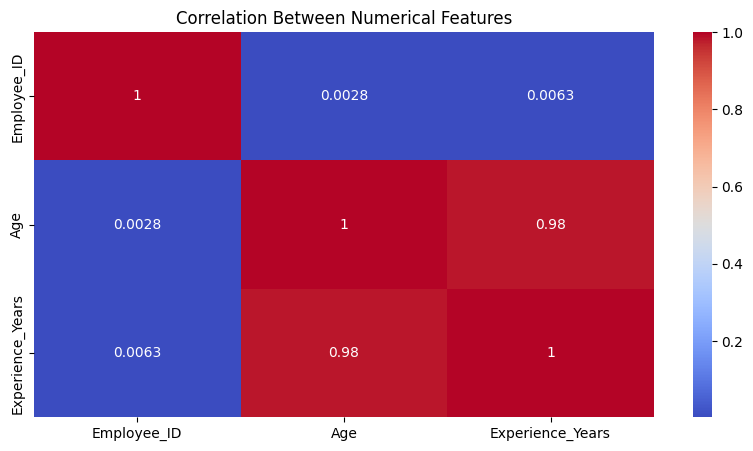

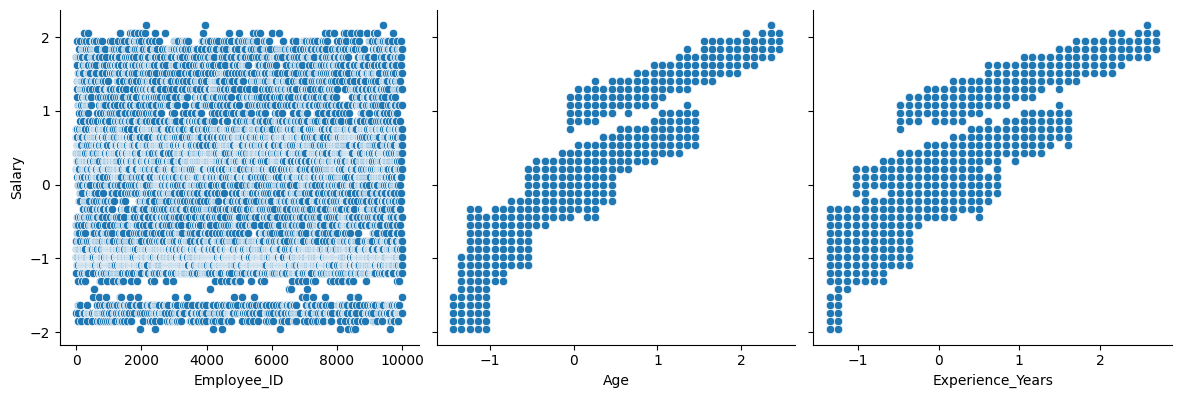

In [ ]:
# For numerical features
numerical_features = df.select_dtypes(include=['int64','float64']).columns.drop(target)
plt.figure(figsize=(10,5))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Numerical Features')
plt.show()

# Pairplot for numerical features vs target
sns.pairplot(df, x_vars=numerical_features, y_vars=target, height=4, kind='scatter')
plt.show()

# 4. Model Building

In [ ]:
# Splitting the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [ ]:
# Preprocessing the data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [ ]:
# Baseline ANN Model
model_base = Sequential([
    Dense(64, input_dim = X_train.shape[1], activation = 'relu'),
    Dense(32, activation = 'relu'),
    Dense(16, activation = 'relu'),
    Dense(1)
])

In [ ]:
# Compiling the model
model_base.compile(loss = 'mse', optimizer = 'adam', metrics = ["r2_score"])

In [ ]:
# Training the model
history_base = model_base.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100, verbose = 1)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 15470743552.0000 - r2_score: -6.1530 - val_loss: 13883183104.0000 - val_r2_score: -5.5914
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 10480510976.0000 - r2_score: -3.9582 - val_loss: 1038996352.0000 - val_r2_score: 0.5067
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 645812928.0000 - r2_score: 0.6890 - val_loss: 432949952.0000 - val_r2_score: 0.7944
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 385555552.0000 - r2_score: 0.8152 - val_loss: 355169024.0000 - val_r2_score: 0.8314
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 324937376.0000 - r2_score: 0.8481 - val_loss: 297966080.0000 - val_r2_score: 0.8585
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 278288960.0000 - r2_score: 0.8699 - val_loss: 255412816.0000 - val_r2_score: 0.8787
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 231613760.0000 - r2_score: 0.8894 - val_loss: 221349680.000

# 5. Model Evaluation

In [ ]:
# Model Evaluaion
loss_base, r2_base = model_base.evaluate(X_test, y_test)
print(f'Loss (MSE): {loss_base}')
print(f'R2 Score: {r2_base}')

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 17377042.0000 - r2_score: 0.9916
Loss (MSE): 17519038.0
R2 Score: 0.9916823506355286


In [ ]:
# Optimized ANN Model
from tensorflow.keras.layers import Dropout

# Optimized model with Dropouts
model_opt = Sequential([
    Dense(128, input_dim = X_train.shape[1], activation = 'relu'),
    Dropout(0.3),
    Dense(64, activation = 'relu'),
    Dropout(0.2),
    Dense(32, activation = 'relu'),
    Dropout(0.1),
    Dense(1)
])

In [ ]:
# Compiling the model
model_opt.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                  loss = 'mse', metrics = ["r2_score"])

In [ ]:
# Early Stopping
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)

In [ ]:
# Training the model
history_opt = model_opt.fit(X_train, y_train, validation_data = (X_test, y_test),
                            epochs = 100, batch_size = 32, callbacks = [early_stop], verbose = 1)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 15070023680.0000 - r2_score: -6.1050 - val_loss: 5997115904.0000 - val_r2_score: -1.8473
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2420119296.0000 - r2_score: -0.1757 - val_loss: 421121056.0000 - val_r2_score: 0.8001
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 557370560.0000 - r2_score: 0.7378 - val_loss: 308398688.0000 - val_r2_score: 0.8536
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 444699264.0000 - r2_score: 0.7920 - val_loss: 241819456.0000 - val_r2_score: 0.8852
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 411263520.0000 - r2_score: 0.8081 - val_loss: 200853424.0000 - val_r2_score: 0.9046
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 365625472.0000 - r2_score: 0.8269 - val_loss: 168163008.0000 - val_r2_score: 0.9202
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 342165568.0000 - r2_score: 0.8396 - val_loss: 144374400.0000 -

In [ ]:
# Evaluating the model
train_loss_opt, train_r2_opt = model_opt.evaluate(X_train, y_train)
print(f'Training Loss (MSE): {train_loss_opt}')
print(f'Training R2 Score: {train_r2_opt}')

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 19263780.0000 - r2_score: 0.9907
Training Loss (MSE): 19264924.0
Training R2 Score: 0.9909358024597168


In [ ]:
# Evaluating the model
test_loss_opt, test_r2_opt = model_opt.evaluate(X_test, y_test)
print(f'Testing Loss (MSE): {test_loss_opt}')
print(f'Testing R2 Score: {test_r2_opt}')

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 18304340.0000 - r2_score: 0.9912
Testing Loss (MSE): 18563640.0
Testing R2 Score: 0.9911863803863525


# 6. Loss Curves

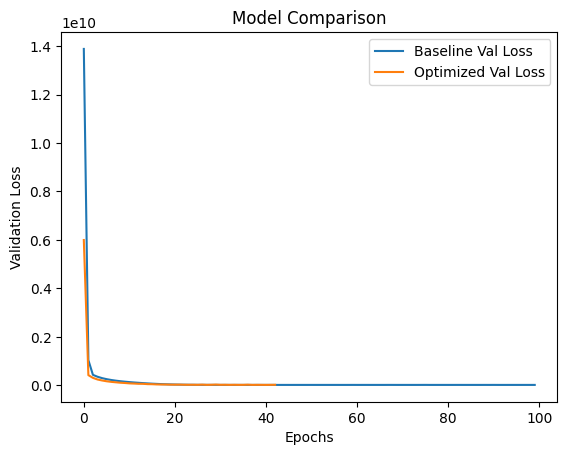

In [ ]:
# Compare Learning Curves
plt.plot(history_base.history['val_loss'], label = 'Baseline Val Loss')
plt.plot(history_opt.history['val_loss'], label = 'Optimized Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.title('Model Comparison')
plt.legend()
plt.show()

In [ ]:
# Predictions
# Example from test set
sample = X_test[0].reshape(1, -1)
predicted_salary = model_opt.predict(sample)
print(f'Predicted Salary: {predicted_salary}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Predicted Salary: [[202213.77]]


In [ ]:
# Custom Input Example
custom_data = pd.DataFrame({
    'Name' : ['sherif'],
    'Age' : [35],
    'Gender' : ['male'],
    'Department' : ['sales'],
    'Job_Title' : ['executive'],
    'Experience_Years' : ['8'],
    'Education_Level' : ['masters'],
    'Location' : ['seatle']
})
custom_processed = preprocessor.transform(custom_data)
predicted_charge = model_opt.predict(custom_processed)
print(f'Predicted Salary: {predicted_salary}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
Predicted Salary: [[202213.77]]


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


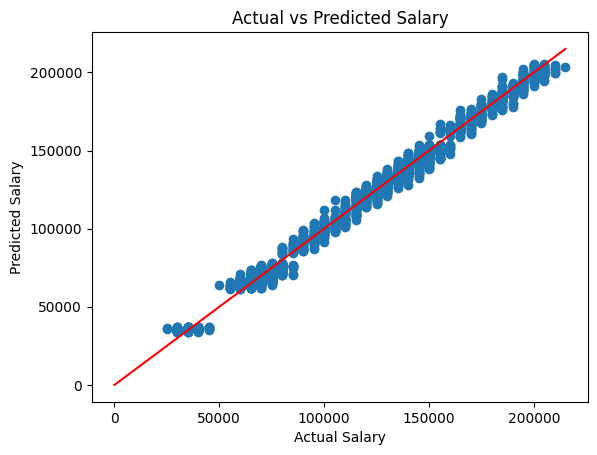

In [ ]:
# Actual vs Predicted Plot
y_pred = model_opt.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs Predicted Salary')
plt.plot([0, max(y_test)], [0, max(y_test)], color = 'red')
plt.show()

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


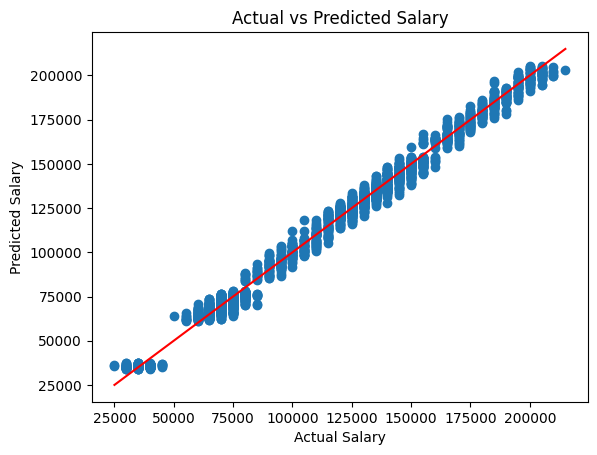

In [ ]:
# Actual vs Predicted Plot
y_pred = model_opt.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs Predicted Salary')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color = 'red')
plt.show()

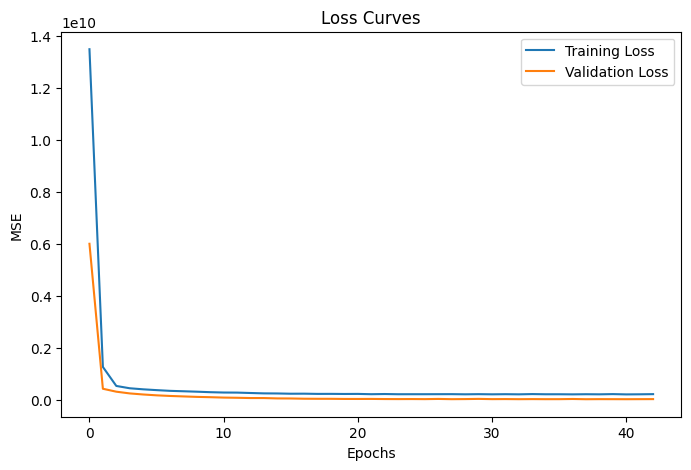

In [ ]:
#Loss curves
plt.figure(figsize=(8,5))
plt.plot(history_opt.history['loss'], label='Training Loss')
plt.plot(history_opt.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()


In [ ]:
# Summary and Key Insights

'''
## Key Insights from EDA
- Years of Experience and Education Level strongly influence Salary.
- Job Role and Department are important categorical features.
- Minimal missing data; outliers handled via preprocessing.

## Model Performance Comparison
- Baseline ANN: MSE=17519038.0, R²=0.99
- Optimized ANN: MSE=119264924.0,  R²=0.99

## Challenges Faced and Solutions
- Skewed data handled by scaling.
- Categorical variables encoded using Label Encoding.
- Overfitting solved using Dropout and EarlyStopping.

## Conclusion
The ANN model successfully predicts employee salaries. Proper EDA, preprocessing, and optimization improved model performance and provided actionable insights.
'''
